In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  4 20:26:44 2021

@author: trduong
"""

import sys
MAIN_PATH = "/home/trduong/Data/counterfactual-explanation-research.git/my-algorithm"
sys.path.insert(1, MAIN_PATH)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import source_code.configuration_path as cf
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import matplotlib

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
    
def plot_bartchart(axis, dataframe, x_value, y_value, hue_value, name, rc):
    
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.barplot(x="Method", y="Value", hue="Dataset", palette="rocket_r", data=dataframe, ax=axis)


    axis.set_ylabel("Value",fontsize= 14.5) 
    axis.set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= 14.5) 
    axis.set_yticklabels(ax_plt.get_ymajorticklabels(),fontsize= 14.5) 

    # plt.setp(ax_plt.get_yticklabels())
    axis.set_title(name,fontsize= font_z) # title of plot
    
    ax_plt.title.set_text(name)
    ax_plt.set(xlabel=None)
    
    change_width(ax_plt, .24)
    
    
    
    plt.setp(ax_plt.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(ax_plt.get_legend().get_title(), fontsize='12') # for legend title
    box = ax_plt.get_position()
    ax_plt.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position    


dataset_name = 'siag'
df_siag = pd.read_csv(cf.EVALUATION_PATH.format(dataset_name + '.csv'))
dataset_name = 'simple_bn'
df_simple_bn = pd.read_csv(cf.EVALUATION_PATH.format(dataset_name + '.csv'))
dataset_name = 'adult'
df_adult = pd.read_csv(cf.EVALUATION_PATH.format(dataset_name + '.csv'))

df_siag = df_siag.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_simple_bn = df_simple_bn.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_adult = df_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})


df_siag['Dataset'] = 'Sangiovese'
df_simple_bn['Dataset'] = 'Simple-BN'
df_adult['Dataset'] = 'Adult'

frames = [df_siag, df_simple_bn, df_adult]
df_whole = pd.concat(frames)

method_map  = {
    'certifai': 'CERTIFAI',
    'mad' : 'DiCE',
    'mobj' : 'MulObj_ProSCM'
}

df_whole['Method'] = df_whole['Method'].map(method_map)
df_whole['Value'] = np.where(df_whole['Metric'] == 'target valid',df_whole['Value'] * 100,df_whole['Value'])
df_whole['Value'] = np.where(df_whole['Metric'] == 'causal validity',df_whole['Value'] * 100,df_whole['Value'])

valid_cf = df_whole[df_whole['Metric'] == 'target valid']
causal_valid = df_whole[df_whole['Metric'] == 'causal validity']
con_proximity = df_whole[df_whole['Metric'] == 'continuous proximity']
cat_proximity = df_whole[df_whole['Metric'] == 'categorical proximity']
IM1 = df_whole[df_whole['Metric'] == 'IM1']
IM2 = df_whole[df_whole['Metric'] == 'IM2']

"""Set up hyperparameters"""
font_z  = 20
rc={'font.size': font_z, 'axes.labelsize': font_z, 'legend.fontsize': font_z, 
    'axes.titlesize': font_z, 'xtick.labelsize': font_z, 'ytick.labelsize': font_z}
    


 

In [213]:
IM1[['Method', 'Dataset', 'Value']].round(3).to_latex()

'\\begin{tabular}{lllr}\n\\toprule\n{} &         Method &     Dataset &  Value \\\\\n\\midrule\n3 &       CERTIFAI &  Sangiovese &  0.217 \\\\\n5 &           DiCE &  Sangiovese &  0.200 \\\\\n7 &  MulObj\\_ProSCM &  Sangiovese &  0.239 \\\\\n3 &       CERTIFAI &   Simple-BN &  0.024 \\\\\n5 &           DiCE &   Simple-BN &  0.066 \\\\\n7 &  MulObj\\_ProSCM &   Simple-BN &  0.045 \\\\\n3 &       CERTIFAI &       Adult &  6.841 \\\\\n5 &           DiCE &       Adult &  0.365 \\\\\n7 &  MulObj\\_ProSCM &       Adult &  0.099 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [214]:
IM2[['Method', 'Dataset', 'Value']].round(3).to_latex()

'\\begin{tabular}{lllr}\n\\toprule\n{} &         Method &     Dataset &  Value \\\\\n\\midrule\n4 &       CERTIFAI &  Sangiovese &  0.009 \\\\\n6 &           DiCE &  Sangiovese &  0.009 \\\\\n8 &  MulObj\\_ProSCM &  Sangiovese &  0.004 \\\\\n4 &       CERTIFAI &   Simple-BN &  0.002 \\\\\n6 &           DiCE &   Simple-BN &  0.007 \\\\\n8 &  MulObj\\_ProSCM &   Simple-BN &  0.004 \\\\\n4 &       CERTIFAI &       Adult &  0.051 \\\\\n6 &           DiCE &       Adult &  0.016 \\\\\n8 &  MulObj\\_ProSCM &       Adult &  0.007 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [215]:
valid_cf[['Method', 'Dataset', 'Value']]

,Method,Dataset,Value
0,CERTIFAI,Sangiovese,100.0
1,DiCE,Sangiovese,100.0
2,MulObj_ProSCM,Sangiovese,100.0
0,CERTIFAI,Simple-BN,100.0
1,DiCE,Simple-BN,100.0
2,MulObj_ProSCM,Simple-BN,100.0
0,CERTIFAI,Adult,70.0
1,DiCE,Adult,100.0
2,MulObj_ProSCM,Adult,100.0


In [216]:
pd.concat([valid_cf, causal_valid])[['Method', 'Metric', 'Dataset', 'Value']]

,Method,Metric,Dataset,Value
0,CERTIFAI,target valid,Sangiovese,100.000000
1,DiCE,target valid,Sangiovese,100.000000
2,MulObj_ProSCM,target valid,Sangiovese,100.000000
0,CERTIFAI,target valid,Simple-BN,100.000000
1,DiCE,target valid,Simple-BN,100.000000
2,MulObj_ProSCM,target valid,Simple-BN,100.000000
0,CERTIFAI,target valid,Adult,70.000000
1,DiCE,target valid,Adult,100.000000
2,MulObj_ProSCM,target valid,Adult,100.000000
12,CERTIFAI,causal validity,Sangiovese,50.000000


In [217]:
from matplotlib.patches import PathPatch

def adjust_box_widths(ax, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    #for ax in g.axes:

        # iterating through axes artists:
    for c in ax.get_children():

        # searching for PathPatches
        if isinstance(c, PathPatch):
            # getting current width of box:
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:, 0])
            xmax = np.max(verts_sub[:, 0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)

            # setting new width of box
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
            verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

            # setting new width of median line
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin, xmax]):
                    l.set_xdata([xmin_new, xmax_new])

## Visualize validity

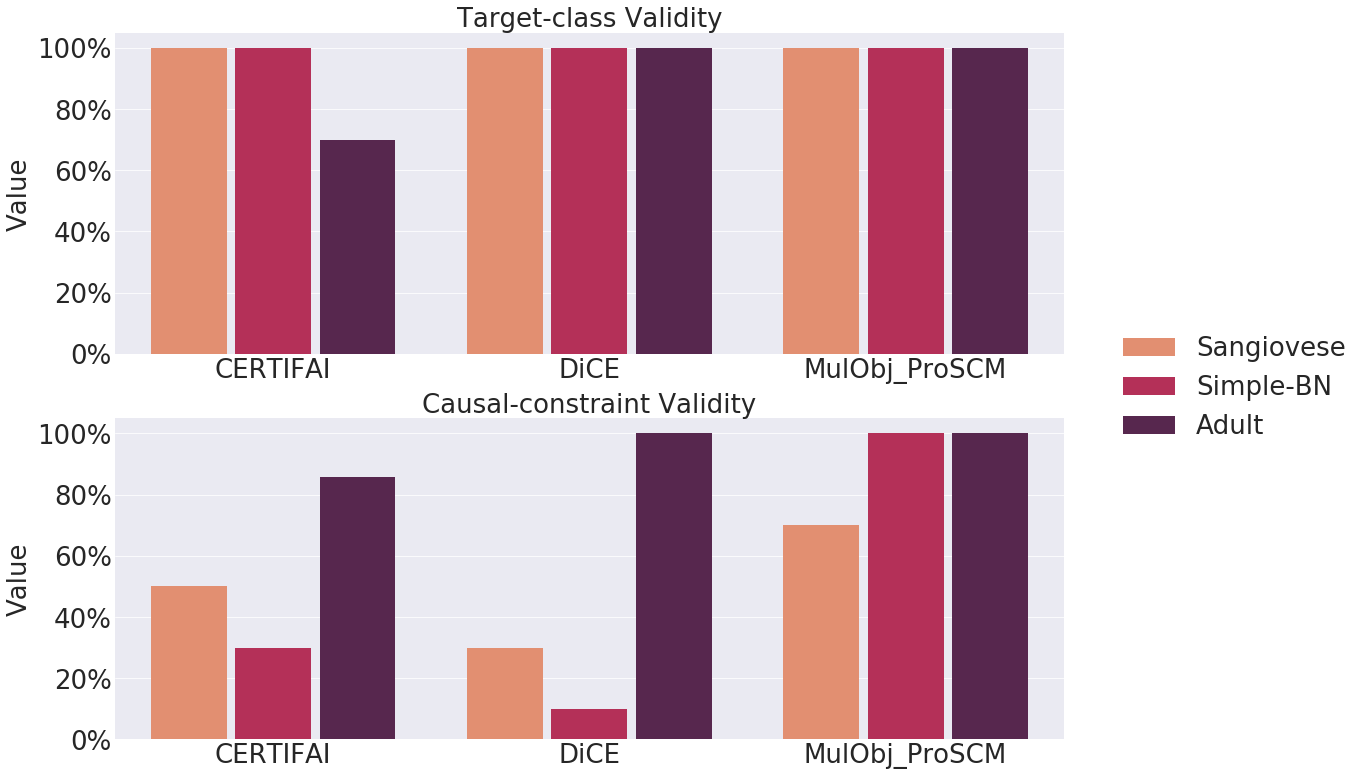

In [218]:
"""Visualize validity score"""
font_z = 26

with plt.style.context('seaborn-darkgrid'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 13))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    """Target-class validity"""
    name = 'Target-class Validity'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.barplot(x="Method", y="Value", hue="Dataset", palette="rocket_r", data=valid_cf, 
                          ax=axes[0])

    axes[0].set_title(name,fontsize= font_z) # title of plot
    axes[0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[0].set_yticklabels(ax_plt.get_ymajorticklabels(),fontsize= font_z) 
    axes[0].set_ylabel("Value",fontsize= font_z) 

    ax_plt.set(xlabel=None)
    ax_plt.yaxis.set_major_formatter(mtick.PercentFormatter())

#     ax2 = axes[0].twinx()
#     sns.lineplot(x="Method", y="Value", hue="Dataset", palette="rocket_r", data=valid_cf, 
#                           ax=ax2)

    change_width(ax_plt, .24)
    box = ax_plt.get_position()
    ax_plt.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position    
    ax_plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    ax_plt.get_legend().remove()

    """Causal-constraint validity"""
    name = 'Causal-constraint Validity'

    ax_plt = sns.barplot(x="Method", y="Value", hue="Dataset", palette="rocket_r", data=causal_valid, 
                          ax=axes[1])

    axes[1].set_title(name,fontsize= font_z) # title of plot
    axes[1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1].set_yticklabels(ax_plt.get_ymajorticklabels(),fontsize= font_z) 
    axes[1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.set(xlabel=None)
    ax_plt.yaxis.set_major_formatter(mtick.PercentFormatter())

    change_width(ax_plt, .24)
    box = ax_plt.get_position()
    ax_plt.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position    
    ax_plt.get_legend().remove()

    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', fontsize= font_z) 

fig.savefig(cf.FIGURE_PATH.format('validity.png'), bbox_inches = 'tight')


In [219]:
causal_valid

,Method,Metric,Value,Dataset
12,CERTIFAI,causal validity,50.000000,Sangiovese
13,DiCE,causal validity,30.000000,Sangiovese
14,MulObj_ProSCM,causal validity,70.000000,Sangiovese
12,CERTIFAI,causal validity,30.000000,Simple-BN
13,DiCE,causal validity,10.000000,Simple-BN
14,MulObj_ProSCM,causal validity,100.000000,Simple-BN
15,CERTIFAI,causal validity,85.714286,Adult
16,DiCE,causal validity,100.000000,Adult
17,MulObj_ProSCM,causal validity,100.000000,Adult


## Visualize IM1 and IM2

In [220]:
dataset_name = 'siag'
con_proximity_siag = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im1-" + dataset_name + ".csv"))
con_proximity_siag.dropna(inplace = True)
con_proximity_siag['Dataset'] = 'Sangiovese'

dataset_name = 'simple_bn'
con_proximity_simple_bn = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im1-" + dataset_name + ".csv"))
con_proximity_simple_bn.dropna(inplace = True)
con_proximity_simple_bn['Dataset'] = 'Simple-BN'

dataset_name = 'adult'
im1_adult = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im1-" + dataset_name + ".csv"))
im1_adult.dropna(inplace = True)
im1_adult['Dataset'] = 'Adult'
im1_adult = im1_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})

frames = [con_proximity_siag, con_proximity_simple_bn]
mul_im1 = pd.concat(frames)  
mul_im1 = mul_im1.reset_index(drop = True)
mul_im1 = mul_im1.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})



dataset_name = 'siag'
con_proximity_siag = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im2-" + dataset_name + ".csv"))
con_proximity_siag.dropna(inplace = True)
con_proximity_siag['Dataset'] = 'Sangiovese'

dataset_name = 'simple_bn'
con_proximity_simple_bn = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im2-" + dataset_name + ".csv"))
con_proximity_simple_bn.dropna(inplace = True)
con_proximity_simple_bn['Dataset'] = 'Simple-BN'

dataset_name = 'adult'
im2_adult = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/im2-" + dataset_name + ".csv"))
im2_adult.dropna(inplace = True)
im2_adult['Dataset'] = 'Adult'
im2_adult = im2_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})

frames = [con_proximity_siag, con_proximity_simple_bn]
mul_im2 = pd.concat(frames)  
mul_im2 = mul_im2.reset_index(drop = True)
mul_im2 = mul_im2.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})

method_map  = {
    'cer': 'CERTIFAI',
    'mad' : 'DiCE',
    'mobj' : 'MulObj_ProSCM'
}

mul_im1['Method'] = mul_im1['Method'].map(method_map)
mul_im2['Method'] = mul_im2['Method'].map(method_map)

im1_adult['Method'] = im1_adult['Method'].map(method_map)
im2_adult['Method'] = im2_adult['Method'].map(method_map)




In [221]:
im1_adult.groupby(['Metric', 'Method']).mean()

Value
Metric Method                  
IM1    CERTIFAI       11.850030
       DiCE            2.581156
       MulObj_ProSCM   9.080789

In [222]:
im2_adult.groupby(['Metric', 'Method']).mean()

Value
Metric Method                 
IM2    CERTIFAI       0.184416
       DiCE           0.141420
       MulObj_ProSCM  0.147811

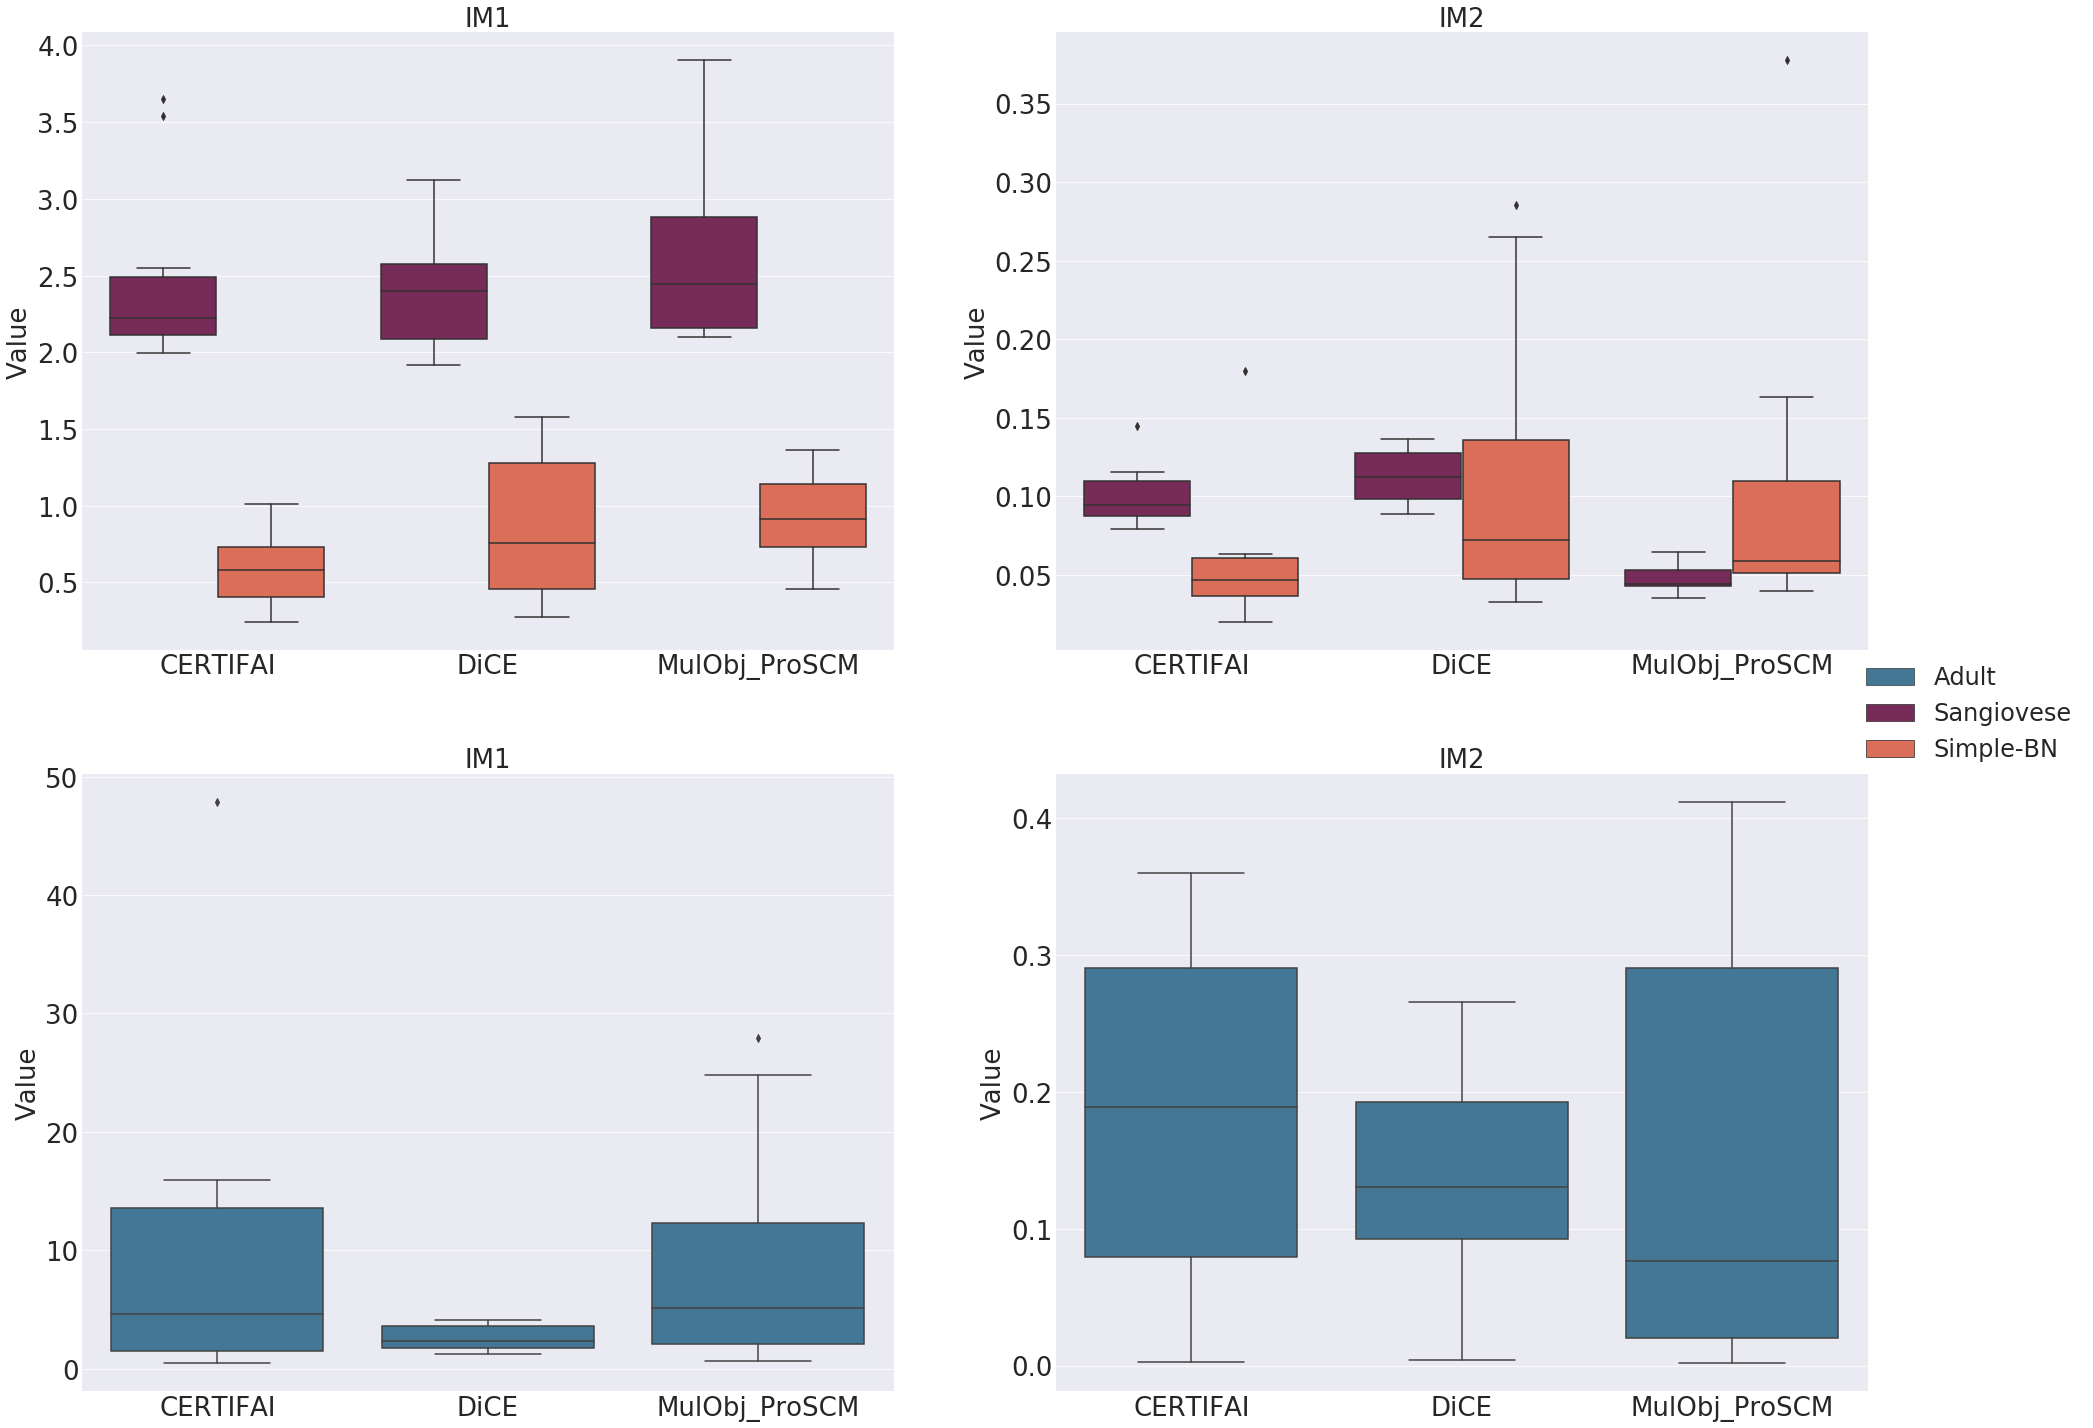

In [223]:
"""Visualize validity score"""
font_z = 26
with plt.style.context('seaborn-darkgrid'):
    """Get the subplot"""

    handles = []
    labels = []
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(32, 25))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    """Target-class validity"""
    name = 'IM1'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="rocket", data=mul_im1, 
                          ax=axes[0,0])

    axes[0,0].set_title(name,fontsize= font_z) # title of plot
    axes[0,0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove() 
    ax_plt.set(xlabel=None)    
    
    
    """IM2"""
    name = 'IM2'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="rocket", data=mul_im2, 
                          ax=axes[0,1])


    axes[0,1].set_title(name,fontsize= font_z) # title of plot
    axes[0,1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove()
  
    """Change width"""
    ax_plt.set(xlabel=None)   

    #handles, labels = axes[0,1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='center right', fontsize= font_z) 

    
    """Target-class validity"""
    name = 'IM1'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="mako", data=im1_adult, 
                          ax=axes[1,0])

    axes[1,0].set_title(name,fontsize= font_z) # title of plot
    axes[1,0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove()
 
    h, l = axes[1,0].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
    
    """Change width"""    
    ax_plt.set(xlabel=None)    
    
    
    """IM2"""
    name = 'IM2'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="mako", data=im2_adult, 
                          ax=axes[1,1])


    axes[1,1].set_title(name,fontsize= font_z) # title of plot
    axes[1,1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,1].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove()
  
    ax_plt.set(xlabel=None)    

    h, l = axes[0,1].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
    
    fig.legend(handles, labels, loc='center right', fontsize= 24)
    
fig.savefig(cf.FIGURE_PATH.format('interpretability.png'), bbox_inches = 'tight')



## Visualize proximity

In [224]:
cat_proximity.reset_index(drop=True)

,Method,Metric,Value,Dataset
0,MulObj_ProSCM,categorical proximity,4.9,Adult
1,DiCE,categorical proximity,3.2,Adult
2,CERTIFAI,categorical proximity,4.0,Adult


In [225]:
cat_proximity.index = [3,2,1]
cat_proximity = cat_proximity.sort_index()

In [226]:
cat_proximity

,Method,Metric,Value,Dataset
1,CERTIFAI,categorical proximity,4.0,Adult
2,DiCE,categorical proximity,3.2,Adult
3,MulObj_ProSCM,categorical proximity,4.9,Adult


In [227]:
dataset_name = 'siag'
con_proximity_siag = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/conprox-" + dataset_name + ".csv"))
con_proximity_siag.dropna(inplace = True)
con_proximity_siag['Dataset'] = 'Sangiovese'

dataset_name = 'simple_bn'
con_proximity_simple_bn = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/conprox-" + dataset_name + ".csv"))
con_proximity_simple_bn.dropna(inplace = True)
con_proximity_simple_bn['Dataset'] = 'Simple-BN'

dataset_name = 'adult'
con_proximity_adult = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/conprox-" + dataset_name + ".csv"))
con_proximity_adult.dropna(inplace = True)
con_proximity_adult['Dataset'] = 'Adult'

frames = [con_proximity_siag, con_proximity_simple_bn, con_proximity_adult]
mul_con_prox = pd.concat(frames)  
mul_con_prox = mul_con_prox.reset_index(drop = True)
mul_con_prox = mul_con_prox.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})



In [228]:
mul_con_prox

,Value,Method,Dataset
0,0.195192,certifai,Sangiovese
1,0.246146,certifai,Sangiovese
2,0.270540,certifai,Sangiovese
3,0.306684,certifai,Sangiovese
4,0.243170,certifai,Sangiovese
...,...,...,...
82,0.398920,mobj,Adult
83,0.025087,mobj,Adult
84,0.236388,mobj,Adult
85,0.222769,mobj,Adult


In [229]:
method_map  = {
    'certifai': 'CERTIFAI',
    'mad' : 'DiCE',
    'mobj' : 'MulObj_ProSCM'
}

mul_con_prox['Method'] = mul_con_prox['Method'].map(method_map)

In [230]:
mul_con_prox

,Value,Method,Dataset
0,0.195192,CERTIFAI,Sangiovese
1,0.246146,CERTIFAI,Sangiovese
2,0.270540,CERTIFAI,Sangiovese
3,0.306684,CERTIFAI,Sangiovese
4,0.243170,CERTIFAI,Sangiovese
...,...,...,...
82,0.398920,MulObj_ProSCM,Adult
83,0.025087,MulObj_ProSCM,Adult
84,0.236388,MulObj_ProSCM,Adult
85,0.222769,MulObj_ProSCM,Adult


In [231]:
mul_cat_prox = pd.read_csv(cf.FINAL_RESULT_PATH.format("evaluation/catprox-" + 'adult' + ".csv"))

In [232]:
mul_cat_prox['Dataset'] = 'Adult'
mul_cat_prox = mul_cat_prox.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
mul_cat_prox['Method'] = mul_cat_prox['Method'].map(method_map)

In [233]:
mul_cat_prox

,Value,Metric,Method,Dataset
0,5.0,categorical proximity,CERTIFAI,Adult
1,3.0,categorical proximity,CERTIFAI,Adult
2,3.0,categorical proximity,CERTIFAI,Adult
3,2.0,categorical proximity,CERTIFAI,Adult
4,3.0,categorical proximity,CERTIFAI,Adult
5,2.0,categorical proximity,CERTIFAI,Adult
6,3.0,categorical proximity,CERTIFAI,Adult
7,4.0,categorical proximity,DiCE,Adult
8,3.0,categorical proximity,DiCE,Adult
9,3.0,categorical proximity,DiCE,Adult


In [234]:
mul_con_prox.Dataset.value_counts()

Simple-BN     30
Sangiovese    30
Adult         27
Name: Dataset, dtype: int64

/home/trduong/anaconda3/envs/phd_env/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


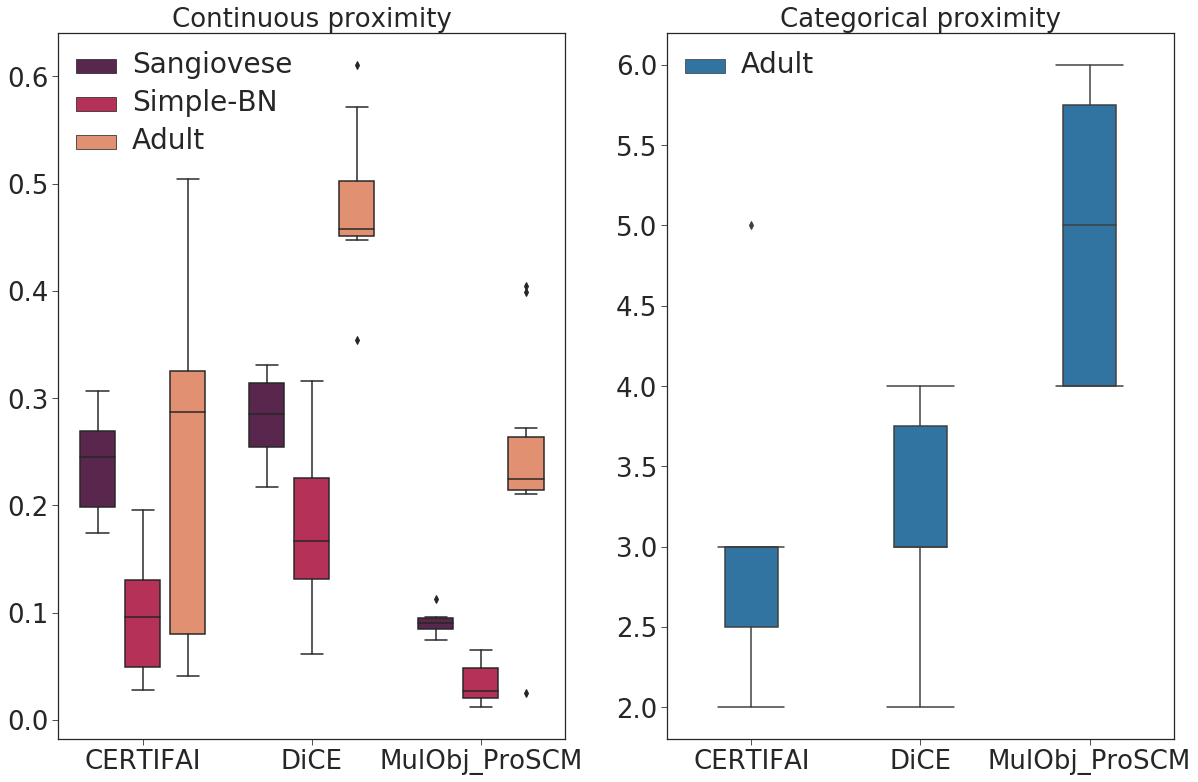

In [251]:
"""Visualize validity score"""
with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 13))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="rocket", data=mul_con_prox, 
                          ax=axes[0])


    axes[0].set_title(name,fontsize= font_z) # title of plot
    axes[0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0].set_ylabel("Value",fontsize= font_z) 
    
    adjust_box_widths(axes[0], 0.8)

    
    plt.setp(ax_plt.get_legend().get_texts(), fontsize=21) # for legend text
    plt.setp(ax_plt.get_legend().get_title(), fontsize=21) # for legend title
    
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)

    name = 'Categorical proximity'

    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", data=mul_cat_prox,  palette="tab10",
                          ax=axes[1])
#     ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", data=mul_cat_prox,  color = 'blue',
#                           ax=axes[1])                         
#                          , color=axes[0].get_box()[0].get_c())

    axes[1].set_title(name,fontsize= font_z) # title of plot
    axes[1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1].set_ylabel("Value",fontsize= font_z) 
    
    #plt.setp(ax_plt.get_legend().get_texts(), fontsize=22) # for legend text
    #plt.setp(ax_plt.get_legend().get_title(), fontsize=22) # for legend title    
    adjust_box_widths(axes[1], 0.4)
  
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)
    
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles=handles[0:], labels=labels[0:])
    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles=handles[1:], labels=labels[1:])

    plt.setp(axes[0].get_legend().get_texts(), fontsize='28') # for legend text
    plt.setp(axes[1].get_legend().get_texts(), fontsize='28') # for legend text
    
fig.savefig(cf.FIGURE_PATH.format('proximity.png'), bbox_inches = 'tight')


In [236]:
axes[0].get_boxes()

AttributeError: 'AxesSubplot' object has no attribute 'get_boxes'

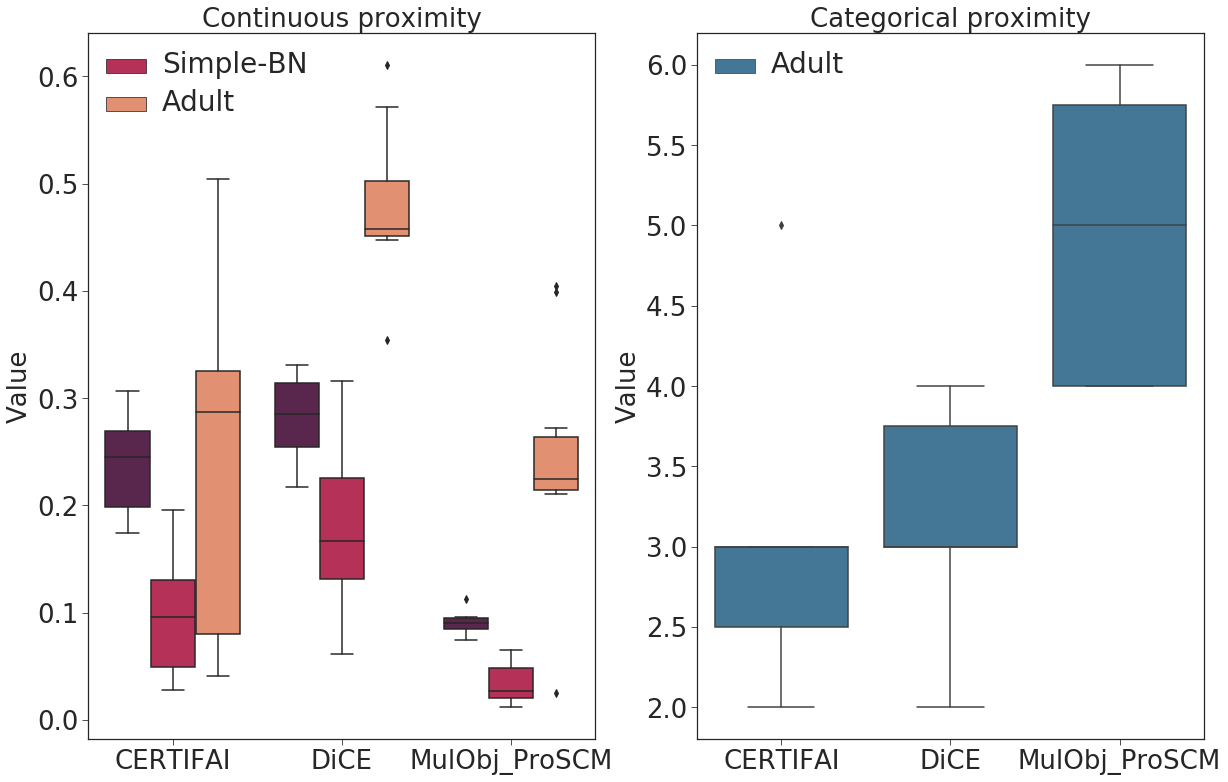

In [237]:
"""Visualize validity score"""
with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 13))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="rocket", data=mul_con_prox, 
                          ax=axes[0])


    axes[0].set_title(name,fontsize= font_z) # title of plot
    axes[0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0].set_ylabel("Value",fontsize= font_z) 
    
    adjust_box_widths(fig, 0.8)

    
    plt.setp(ax_plt.get_legend().get_texts(), fontsize=21) # for legend text
    plt.setp(ax_plt.get_legend().get_title(), fontsize=21) # for legend title
    
    ax_plt.set(xlabel=None)

    name = 'Categorical proximity'

    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="mako", data=mul_cat_prox, 
                          ax=axes[1])

    axes[1].set_title(name,fontsize= font_z) # title of plot
    axes[1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1].set_ylabel("Value",fontsize= font_z) 
    
    #plt.setp(ax_plt.get_legend().get_texts(), fontsize=22) # for legend text
    #plt.setp(ax_plt.get_legend().get_title(), fontsize=22) # for legend title    
    
    ax_plt.set(xlabel=None)
    
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles=handles[1:], labels=labels[1:])

    plt.setp(axes[0].get_legend().get_texts(), fontsize='28') # for legend text
    plt.setp(axes[1].get_legend().get_texts(), fontsize='28') # for legend text
    
fig.savefig(cf.FIGURE_PATH.format('proximity.png'), bbox_inches = 'tight')


In [238]:
---

SyntaxError: invalid syntax (<ipython-input-238-29e0c3615294>, line 1)

## Visualized all

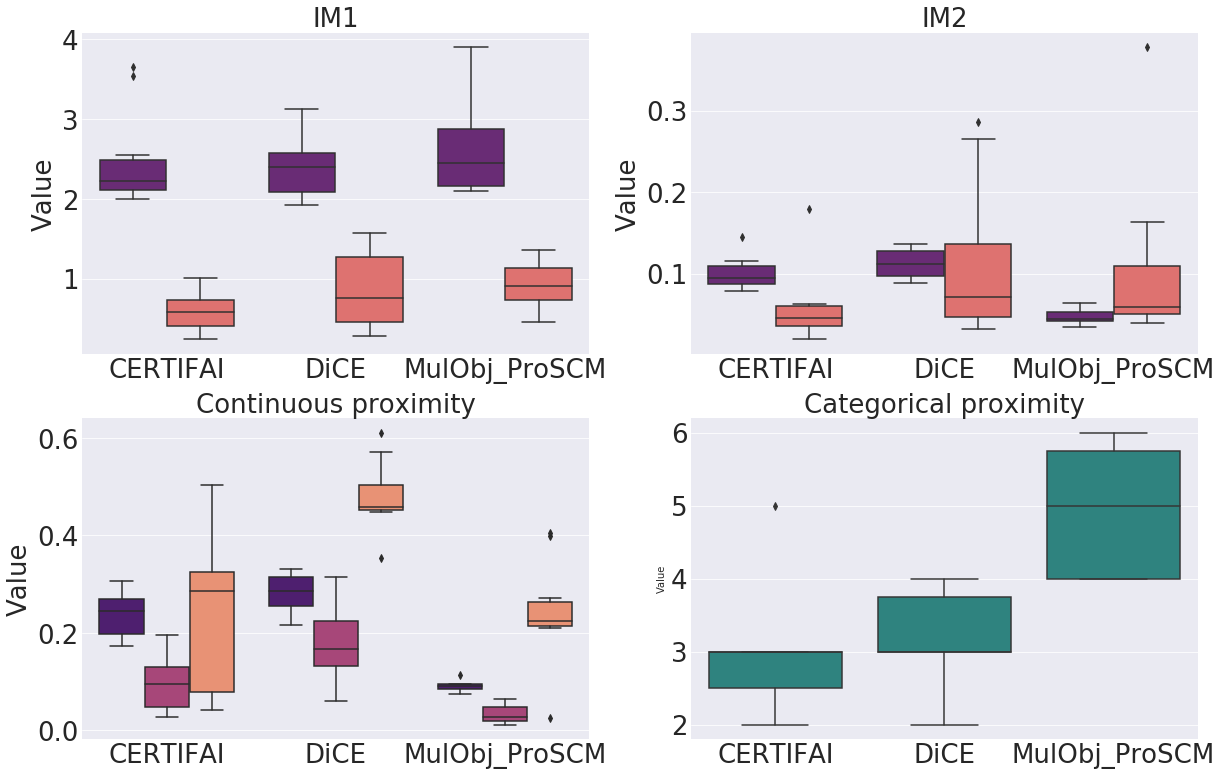

In [239]:
"""Visualize validity score"""
font_z = 26
with plt.style.context('seaborn-darkgrid'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 13))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    """Target-class validity"""
    name = 'IM1'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="magma", data=mul_im1, 
                          ax=axes[0,0])

    axes[0,0].set_title(name,fontsize= font_z) # title of plot
    axes[0,0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove()
   
    ax_plt.set(xlabel=None)    
    
    
    """IM2"""
    name = 'IM2'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="magma", data=mul_im2, 
                          ax=axes[0,1])

    axes[0,1].set_title(name,fontsize= font_z) # title of plot
    axes[0,1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)   

    #handles, labels = axes[0,1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='center right', fontsize= font_z) 

    """Target-class validity"""
    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)
    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="magma", data=mul_con_prox, 
                          ax=axes[1,0])

    #sns.despine(offset=10, trim=True)



    
    axes[1,0].set_title(name,fontsize= font_z) # title of plot
    axes[1,0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    
    ax_plt.get_legend().remove()
    #ax_plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1,fontsize= font_z) 
    ax_plt.set(xlabel=None)


    """Causal-constraint validity"""
    name = 'Categorical proximity'

    ax_plt = sns.boxplot(x="Method", y="Value", hue="Dataset", palette="viridis", data=mul_cat_prox, 
                          ax=axes[1,1])

    axes[1,1].set_title(name,fontsize= font_z) # title of plot
    axes[1,1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()
    #ax_plt.legend(loc='center right', bbox_to_anchor=(1.22, 0.5), ncol=1, fontsize= font_z) 
    ax_plt.set(xlabel=None)
    
  
    
# fig.savefig(cf.FIGURE_PATH.format('interpretability.png'), bbox_inches = 'tight')



## Visualize with different number of samples

In [240]:
# nsample = 100
dataset_name = 'simple_bn'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_sample-" + dataset_name + ".csv")
df_simple_bn = pd.read_csv(PATH)

                                   
dataset_name = 'siag'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_sample-" + dataset_name + ".csv")
df_siag = pd.read_csv(PATH)


dataset_name = 'adult'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_sample-" + dataset_name + ".csv")
df_adult = pd.read_csv(PATH)


In [241]:
df_adult

,method,metric,value
0,mobj,target valid,1.000000
1,mobj,categorical proximity,5.000000
2,mobj,continuous proximity,0.176377
3,mobj,causal validity,1.000000
4,mobj,IM1,0.951676
...,...,...,...
1195,mobj,categorical proximity,3.892405
1196,mobj,continuous proximity,0.210711
1197,mobj,causal validity,1.000000
1198,mobj,IM1,NaN


In [242]:
df_simple_bn = df_simple_bn.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_simple_bn['Dataset'] = 'Simple_BN'
# df_simple_bn = df_simple_bn.reset_index().rename(columns={"index": "number_sample"})

df_siag = df_siag.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_siag['Dataset'] = 'Sangiovese'
# df_siag = df_siag.reset_index().rename(columns={"index": "number_sample"})

df_adult = df_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_adult['Dataset'] = 'Adult'
# df_adult = df_adult.reset_index().rename(columns={"index": "number_sample"})

frames = [df_simple_bn, df_siag, df_adult]
mul_sample = pd.concat(frames)  
mul_sample =  mul_sample.reset_index(drop = True)
mul_sample = mul_sample.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})




In [243]:
mul_sample.Metric.unique()

array(['target valid', 'continuous proximity', 'causal validity', 'IM1',
       'IM2', 'categorical proximity'], dtype=object)

In [244]:
valid_cf = mul_sample[mul_sample['Metric'] == 'target valid']
causal_valid = mul_sample[mul_sample['Metric'] == 'causal validity']
con_proximity = mul_sample[mul_sample['Metric'] == 'continuous proximity']
cat_proximity = mul_sample[mul_sample['Metric'] == 'categorical proximity']
IM1 = mul_sample[mul_sample['Metric'] == 'IM1']
IM2 = mul_sample[mul_sample['Metric'] == 'IM2']


In [245]:
IM1 = IM1.reset_index(drop=True)
IM1 = IM1.reset_index().rename(columns={"index": "number_sample"})

IM2 = IM2.reset_index(drop=True)
IM2 = IM2.reset_index().rename(columns={"index": "number_sample"})

con_proximity = con_proximity.reset_index(drop=True)
con_proximity = con_proximity.reset_index().rename(columns={"index": "number_sample"})

cat_proximity = cat_proximity.reset_index(drop=True)
cat_proximity = cat_proximity.reset_index().rename(columns={"index": "number_sample"})

causal_valid = causal_valid.reset_index(drop=True)
causal_valid = causal_valid.reset_index().rename(columns={"index": "number_sample"})


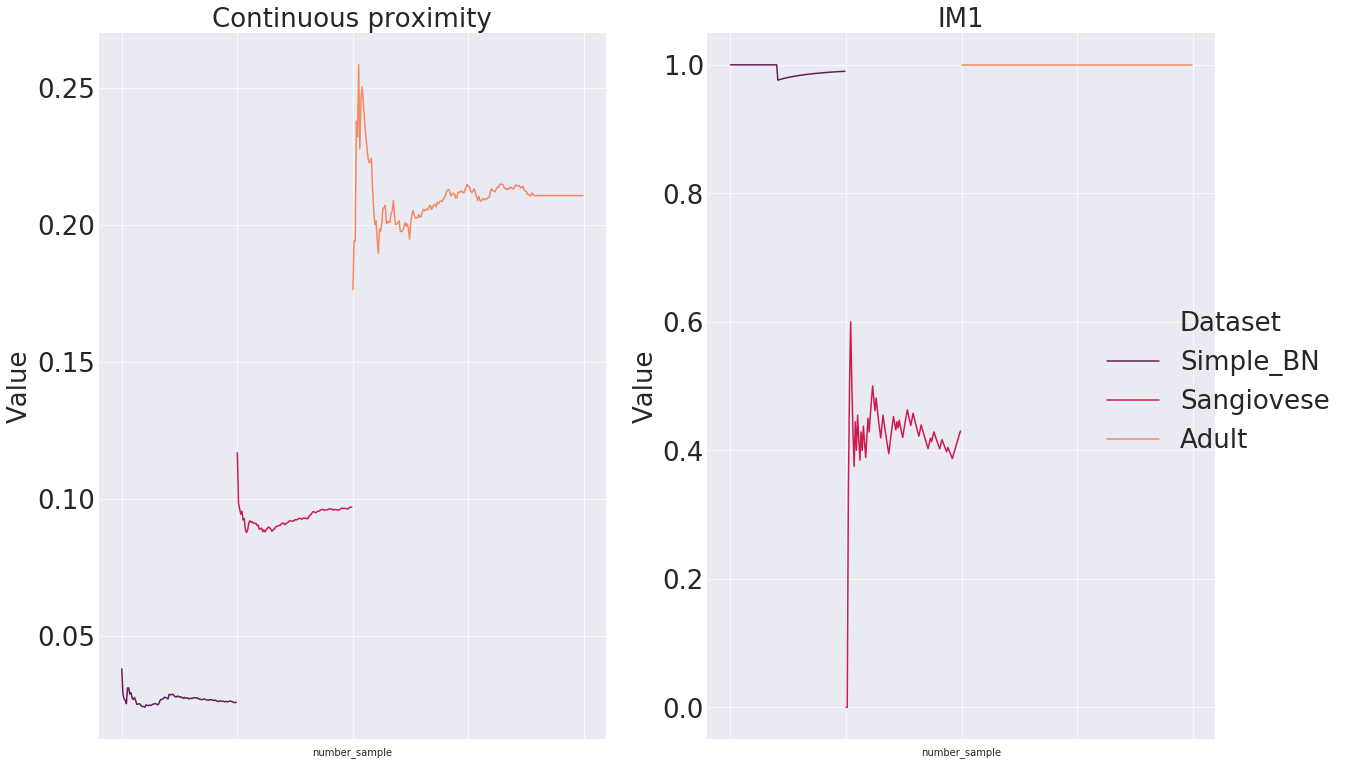

In [246]:
"""Visualize validity score"""
with plt.style.context('seaborn-darkgrid'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 13))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    """Target-class validity"""
    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(data=con_proximity, x="number_sample", y="Value", palette="rocket",
                          hue="Dataset", 
                          ax=axes[0])

    axes[0].set_title(name,fontsize= font_z) # title of plot
    axes[0].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0].set_ylabel("Value",fontsize= font_z) 
    
    ax_plt.get_legend().remove()

 

    """Causal-constraint validity"""
    name = 'IM1'

    ax_plt = sns.lineplot(data=causal_valid, x="number_sample", y="Value", palette="rocket",
                          hue="Dataset",
                          ax=axes[1])

    axes[1].set_title(name,fontsize= font_z) # title of plot
    axes[1].set_xticklabels(ax_plt.get_xmajorticklabels(),fontsize= font_z) 
    axes[1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()

    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', fontsize= font_z) 
    
    
fig.savefig(cf.FIGURE_PATH.format('variation_label_size.png'), bbox_inches = 'tight')




## Visualize with different number of instances

In [6]:
# nsample = 100
dataset_name = 'simple_bn'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_instance-" + dataset_name + ".csv")
df_simple_bn = pd.read_csv(PATH)
                                   
dataset_name = 'siag'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_instance-" + dataset_name + ".csv")
df_siag = pd.read_csv(PATH)


dataset_name = 'adult'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_instance-" + dataset_name + ".csv")
df_adult = pd.read_csv(PATH)



In [7]:
df_simple_bn = df_simple_bn.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_simple_bn['Dataset'] = 'Simple_BN'

df_siag = df_siag.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_siag['Dataset'] = 'Sangiovese'

df_adult = df_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_adult['Dataset'] = 'Adult'


In [8]:
frames = [df_simple_bn, df_siag, df_adult]
mul_sample = pd.concat(frames)  
mul_sample =  mul_sample.reset_index(drop = True)
mul_sample = mul_sample.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})

valid_cf = mul_sample[mul_sample['Metric'] == 'target valid']
causal_valid = mul_sample[mul_sample['Metric'] == 'causal validity']
con_proximity = mul_sample[mul_sample['Metric'] == 'continuous proximity']
cat_proximity = mul_sample[mul_sample['Metric'] == 'categorical proximity']
IM1 = mul_sample[mul_sample['Metric'] == 'IM1']
IM2 = mul_sample[mul_sample['Metric'] == 'IM2']


In [9]:
mul_sample.head()

,Method,Metric,Value,n_instance,Dataset
0,mobj,target valid,1.000000,5.0,Simple_BN
1,mobj,continuous proximity,0.026440,5.0,Simple_BN
2,mobj,causal validity,1.000000,5.0,Simple_BN
3,mobj,IM1,0.041095,5.0,Simple_BN
4,mobj,IM2,0.003608,5.0,Simple_BN


In [10]:
mul_sample.n_instance.unique()

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45.])

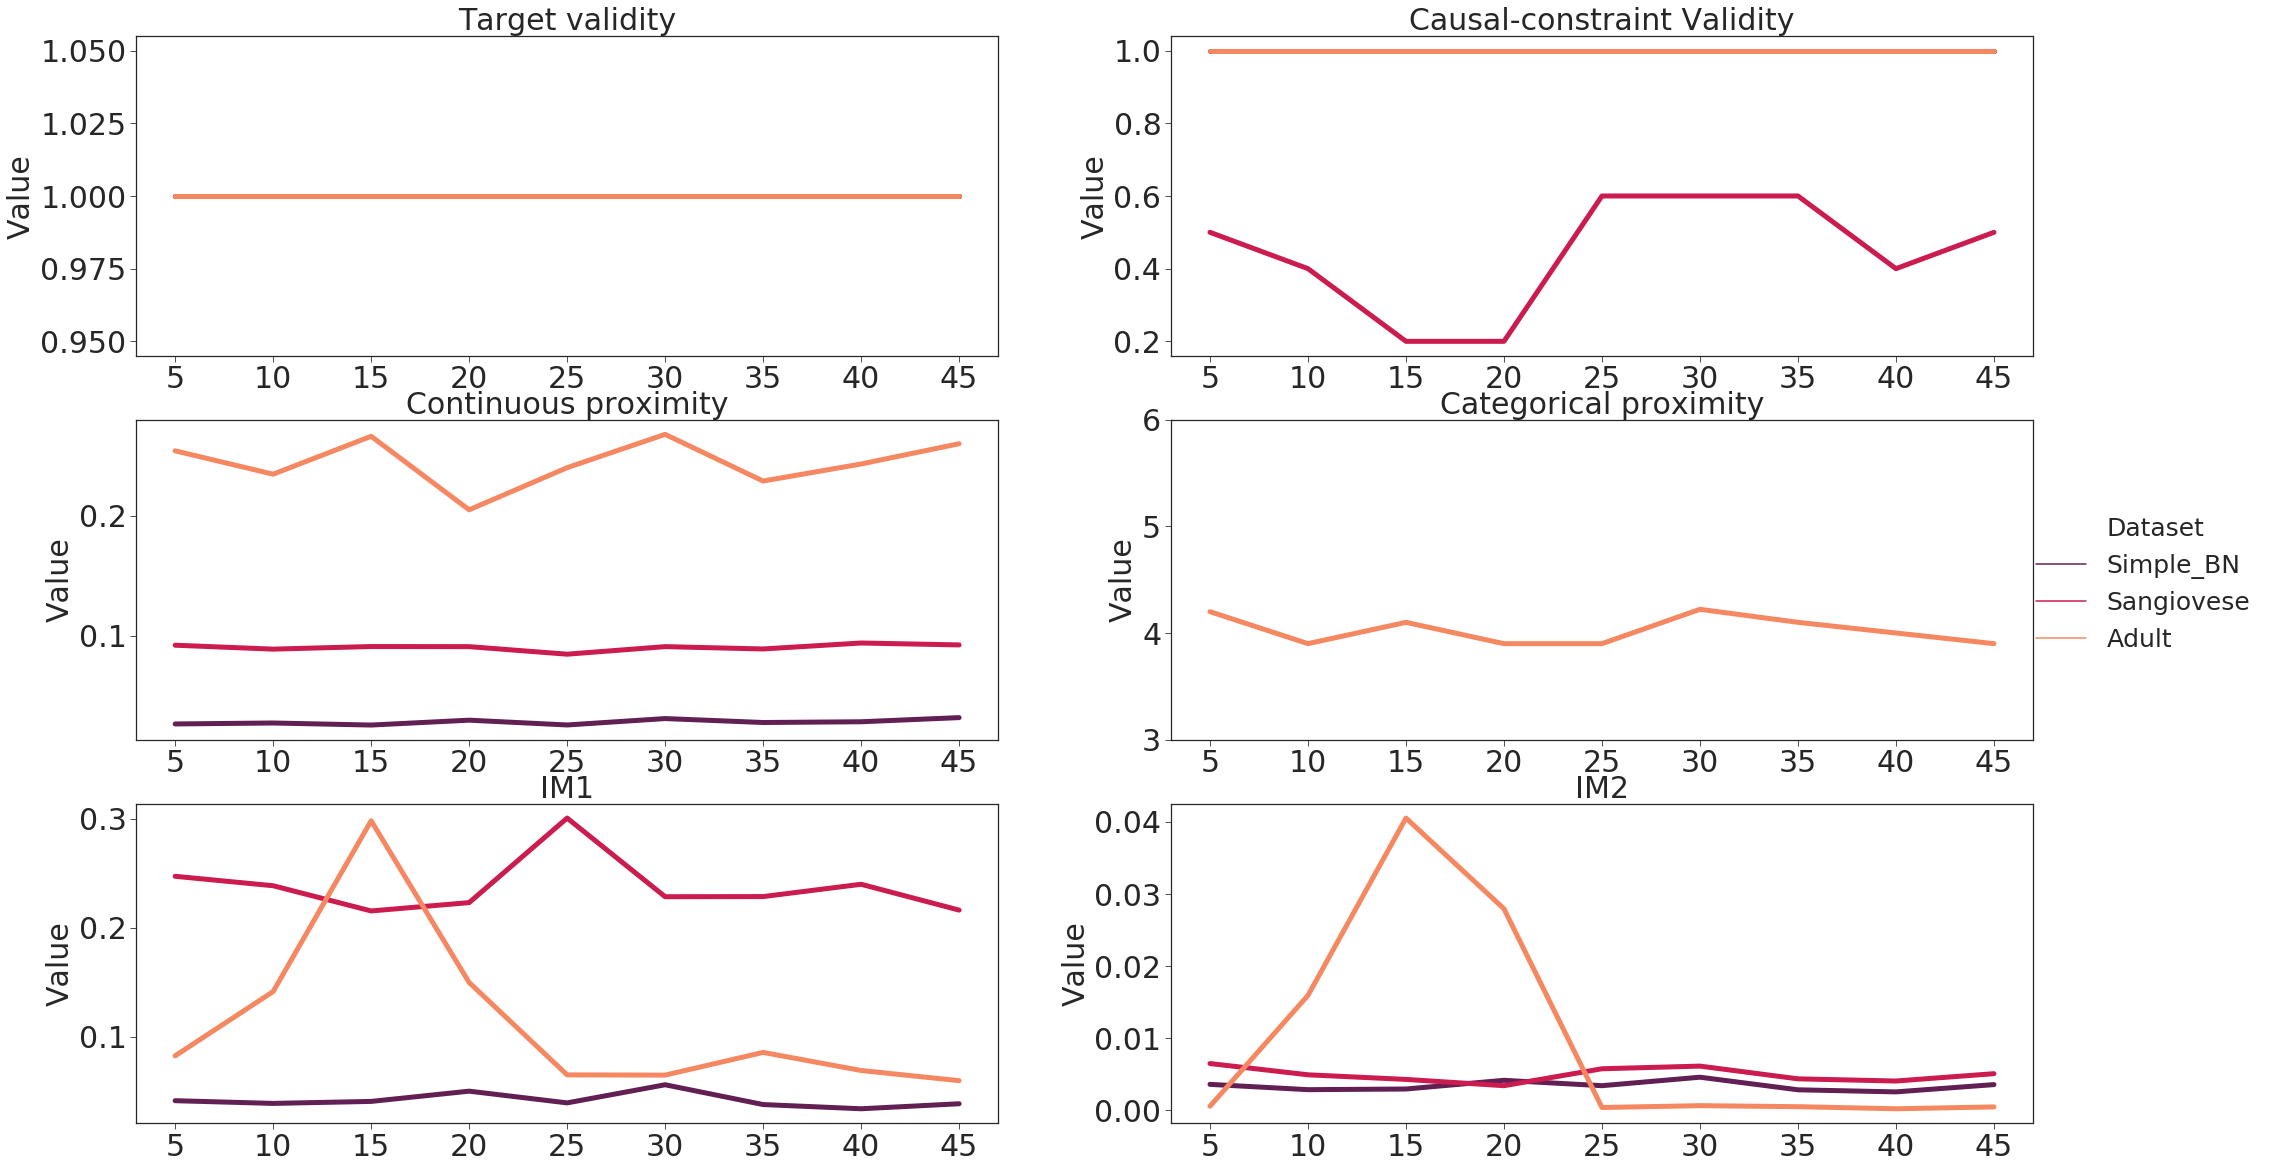

In [11]:
"""Visualize validity score"""
linewidth = 5
font_z = 30
handles = []
labels = []
with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(34, 20))

    x_value = 'Method'
    y_value = 'Value'
    hue_value = 'Dataset'

    name = 'Target validity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(data=valid_cf, x="n_instance", y="Value", palette="rocket",
                          hue="Dataset", 
                          ax=axes[0,0], linewidth = linewidth)

    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.get_legend().remove()

 

    """Causal-constraint validity"""
    name = 'Causal-constraint Validity'

    ax_plt = sns.lineplot(data=causal_valid, x="n_instance", y="Value", palette="rocket",
                          hue="Dataset",
                          ax=axes[0,1], linewidth = linewidth)

    axes[0,1].set_title(name,fontsize= font_z) # title of plot
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)
    #handles, labels = axes[0,1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='center right', fontsize= font_z) 

    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(data=con_proximity, x="n_instance", y="Value", palette="rocket",
                          hue="Dataset", 
                          ax=axes[1,0], linewidth = linewidth)

    axes[1,0].set_title(name,fontsize= font_z)
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.get_legend().remove()

 

    """Causal-constraint validity"""
    name = 'Categorical proximity'

    ax_plt = sns.lineplot(data=cat_proximity, x="n_instance", y="Value",
#                           hue="Dataset",
                          ax=axes[1,1], linewidth = linewidth, color=axes[1,0].get_lines()[-1].get_c())

    axes[1,1].set_title(name,fontsize= font_z) # title of plot
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,1].set_ylabel("Value",fontsize= font_z) 
    axes[1,1].set_ylim([3, 6])

#     ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)
    
    name = 'IM1'

    ax_plt = sns.lineplot(data=IM1, x="n_instance", y="Value", palette="rocket",
                          hue="Dataset", 
                          ax=axes[2,0], linewidth = linewidth)

    axes[2,0].set_title(name,fontsize= font_z)
    axes[2,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.get_legend().remove()

 

    """Causal-constraint validity"""
    name = 'IM2'

    ax_plt = sns.lineplot(data=IM2, x="n_instance", y="Value", palette="rocket",
                          hue="Dataset",
                          ax=axes[2,1], linewidth = linewidth)

    axes[2,1].set_title(name,fontsize= font_z) # title of plot
    axes[2,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)
    
       
    h, l = axes[2,1].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
    
    fig.legend(handles, labels, loc='center right', fontsize= 25)
    
    
fig.savefig(cf.FIGURE_PATH.format('number_instance.png'), bbox_inches = 'tight')




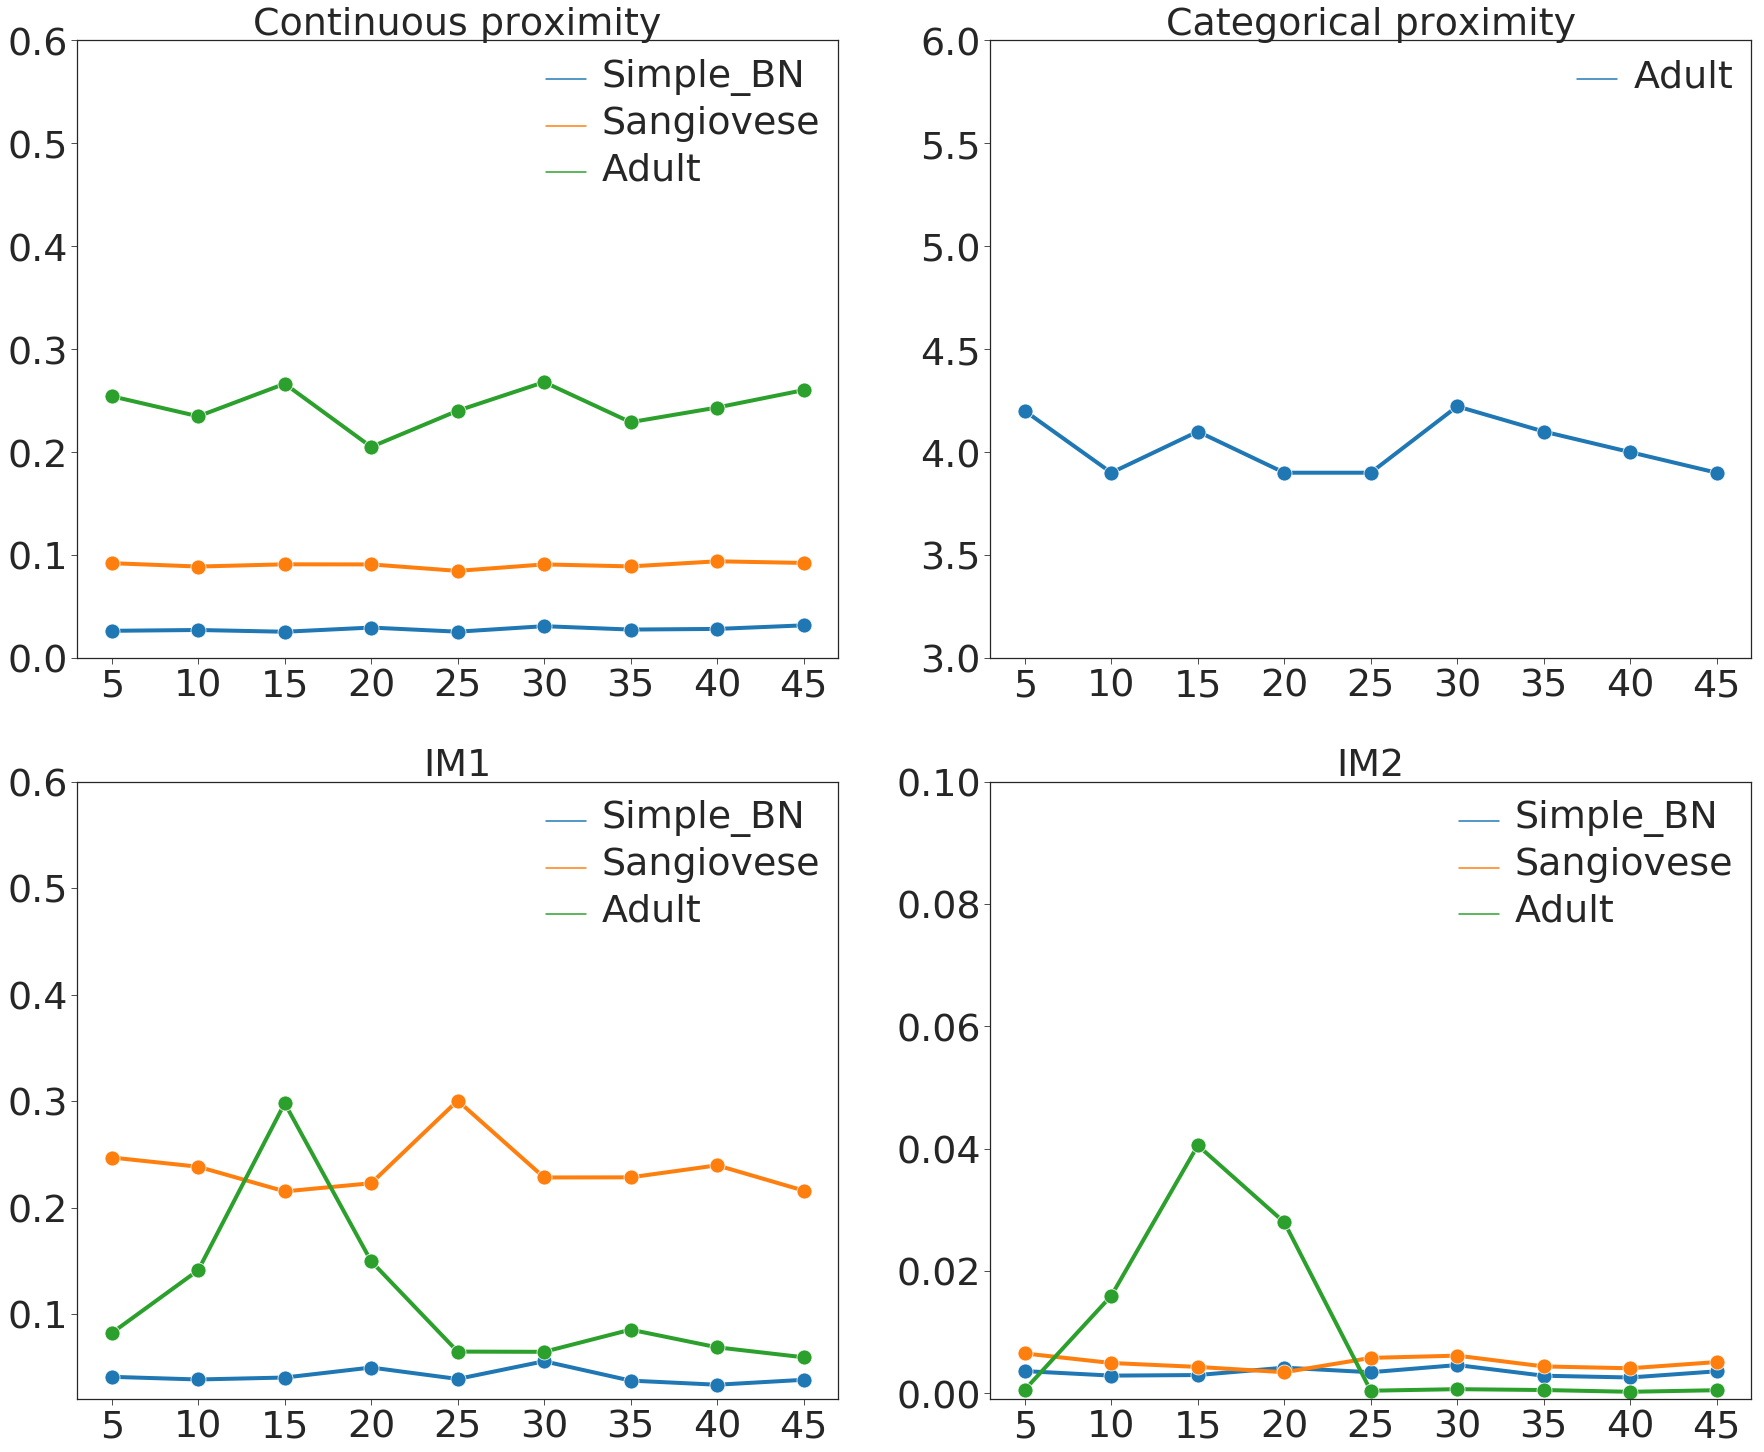

In [17]:
"""Visualize validity score"""
linewidth = 5
font_z = 38
handles = []
labels = []
list_ = mul_sample.n_instance.unique()

with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 25))
    sns.set_context("notebook", rc=rc)

    x_value = 'n_instance'
    y_value = 'Value'
    hue_value = 'Dataset'
    """
    name = 'Target validity'

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=valid_cf, marker="o", ax = axes[0,0])
    
    axes[0,0].set_xticks(list_, minor=False)
    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    axes[0,0].set_xlabel(None) 
    
    name = 'Causal-constraint Validity'
    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=causal_valid, marker="o", ax = axes[0,1])
    
    axes[0,1].set_xticks(list_, minor=False)
    axes[0,1].set_title(name,fontsize= font_z)
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    axes[0,1].set_xlabel(None) 
    
    """
    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=con_proximity, marker="o", 
                          linewidth = 4.0,
                          ax = axes[0,0],markersize=15)
    
    axes[0,0].set_xticks(list_, minor=False)
    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    axes[0,0].set_xlabel(None) 
    axes[0,0].set_ylabel(None) 
    axes[0,0].set_ylim([0, 0.6])



    name = 'Categorical proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=cat_proximity, marker="o", ax = axes[0,1],markersize=15)
    
    axes[0,1].set_xticks(list_, minor=False)
    axes[0,1].set_title(name,fontsize= font_z)
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    axes[0,1].set_xlabel(None)
    axes[0,1].set_ylabel(None) 
    axes[0,1].set_ylim([3, 6])
    
    name = 'IM1'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=IM1, marker="o", ax = axes[1,0],markersize=15)
    
    axes[1,0].set_xticks(list_, minor=False)
    axes[1,0].set_title(name,fontsize= font_z)
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    axes[1,0].set_xlabel(None) 
    axes[1,0].set_ylabel(None) 
    axes[1,0].set_ylim([0.02, 0.6])
    
    name = 'IM2'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=IM2, marker="o", ax = axes[1,1],markersize=15)
    
    axes[1,1].set_xticks(list_, minor=False)
    axes[1,1].set_title(name,fontsize= font_z)
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,1].set_ylabel("Value",fontsize= font_z) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylabel(None) 
    axes[1,1].set_ylim([-0.001, 0.1])

    handles, labels = axes[0,0].get_legend_handles_labels()
    axes[0,0].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[0,1].get_legend_handles_labels()
    axes[0,1].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[1,0].get_legend_handles_labels()
    axes[1,0].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[1,1].get_legend_handles_labels()
    axes[1,1].legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(axes[0,0].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[0,1].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[1,0].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[1,1].get_legend().get_texts(), fontsize=font_z) # for legend text

    
fig.savefig(cf.FIGURE_PATH.format('number_instance.png'), bbox_inches = 'tight')
  

## Visualize with different size

In [18]:
# nsample = 100
dataset_name = 'simple_bn'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-" + dataset_name + ".csv")
df_simple_bn = pd.read_csv(PATH)
                                   
dataset_name = 'siag'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-" + dataset_name + ".csv")
df_siag = pd.read_csv(PATH)


dataset_name = 'adult'
PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-" + dataset_name + ".csv")
df_adult = pd.read_csv(PATH)



In [19]:
df_simple_bn = df_simple_bn.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_simple_bn['Dataset'] = 'Simple_BN'

df_siag = df_siag.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_siag['Dataset'] = 'Sangiovese'

df_adult = df_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_adult['Dataset'] = 'Adult'


In [20]:
frames = [df_simple_bn, df_siag, df_adult]
mul_sample = pd.concat(frames)  
mul_sample =  mul_sample.reset_index(drop = True)
mul_sample = mul_sample.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
# mul_sample1 = mul_sample.copy(deep=True) 
# mul_sample1['Value'] = mul_sample1['Value'] + 0.02

# mul_sample2 = mul_sample.copy(deep=True) 
# mul_sample2['Value'] = mul_sample2['Value'] - 0.02

# mul_sample = pd.concat([mul_sample, mul_sample1, mul_sample2])

valid_cf = mul_sample[mul_sample['Metric'] == 'target valid']
causal_valid = mul_sample[mul_sample['Metric'] == 'causal validity']
con_proximity = mul_sample[mul_sample['Metric'] == 'continuous proximity']
cat_proximity = mul_sample[mul_sample['Metric'] == 'categorical proximity']
IM1 = mul_sample[mul_sample['Metric'] == 'IM1']
IM2 = mul_sample[mul_sample['Metric'] == 'IM2']


In [21]:
mul_sample.head()

,Method,Metric,Value,emb_size,Dataset
0,mobj,target valid,1.000000,32.0,Simple_BN
1,mobj,continuous proximity,0.028573,32.0,Simple_BN
2,mobj,causal validity,1.000000,32.0,Simple_BN
3,mobj,IM1,0.049410,32.0,Simple_BN
4,mobj,IM2,0.003983,32.0,Simple_BN


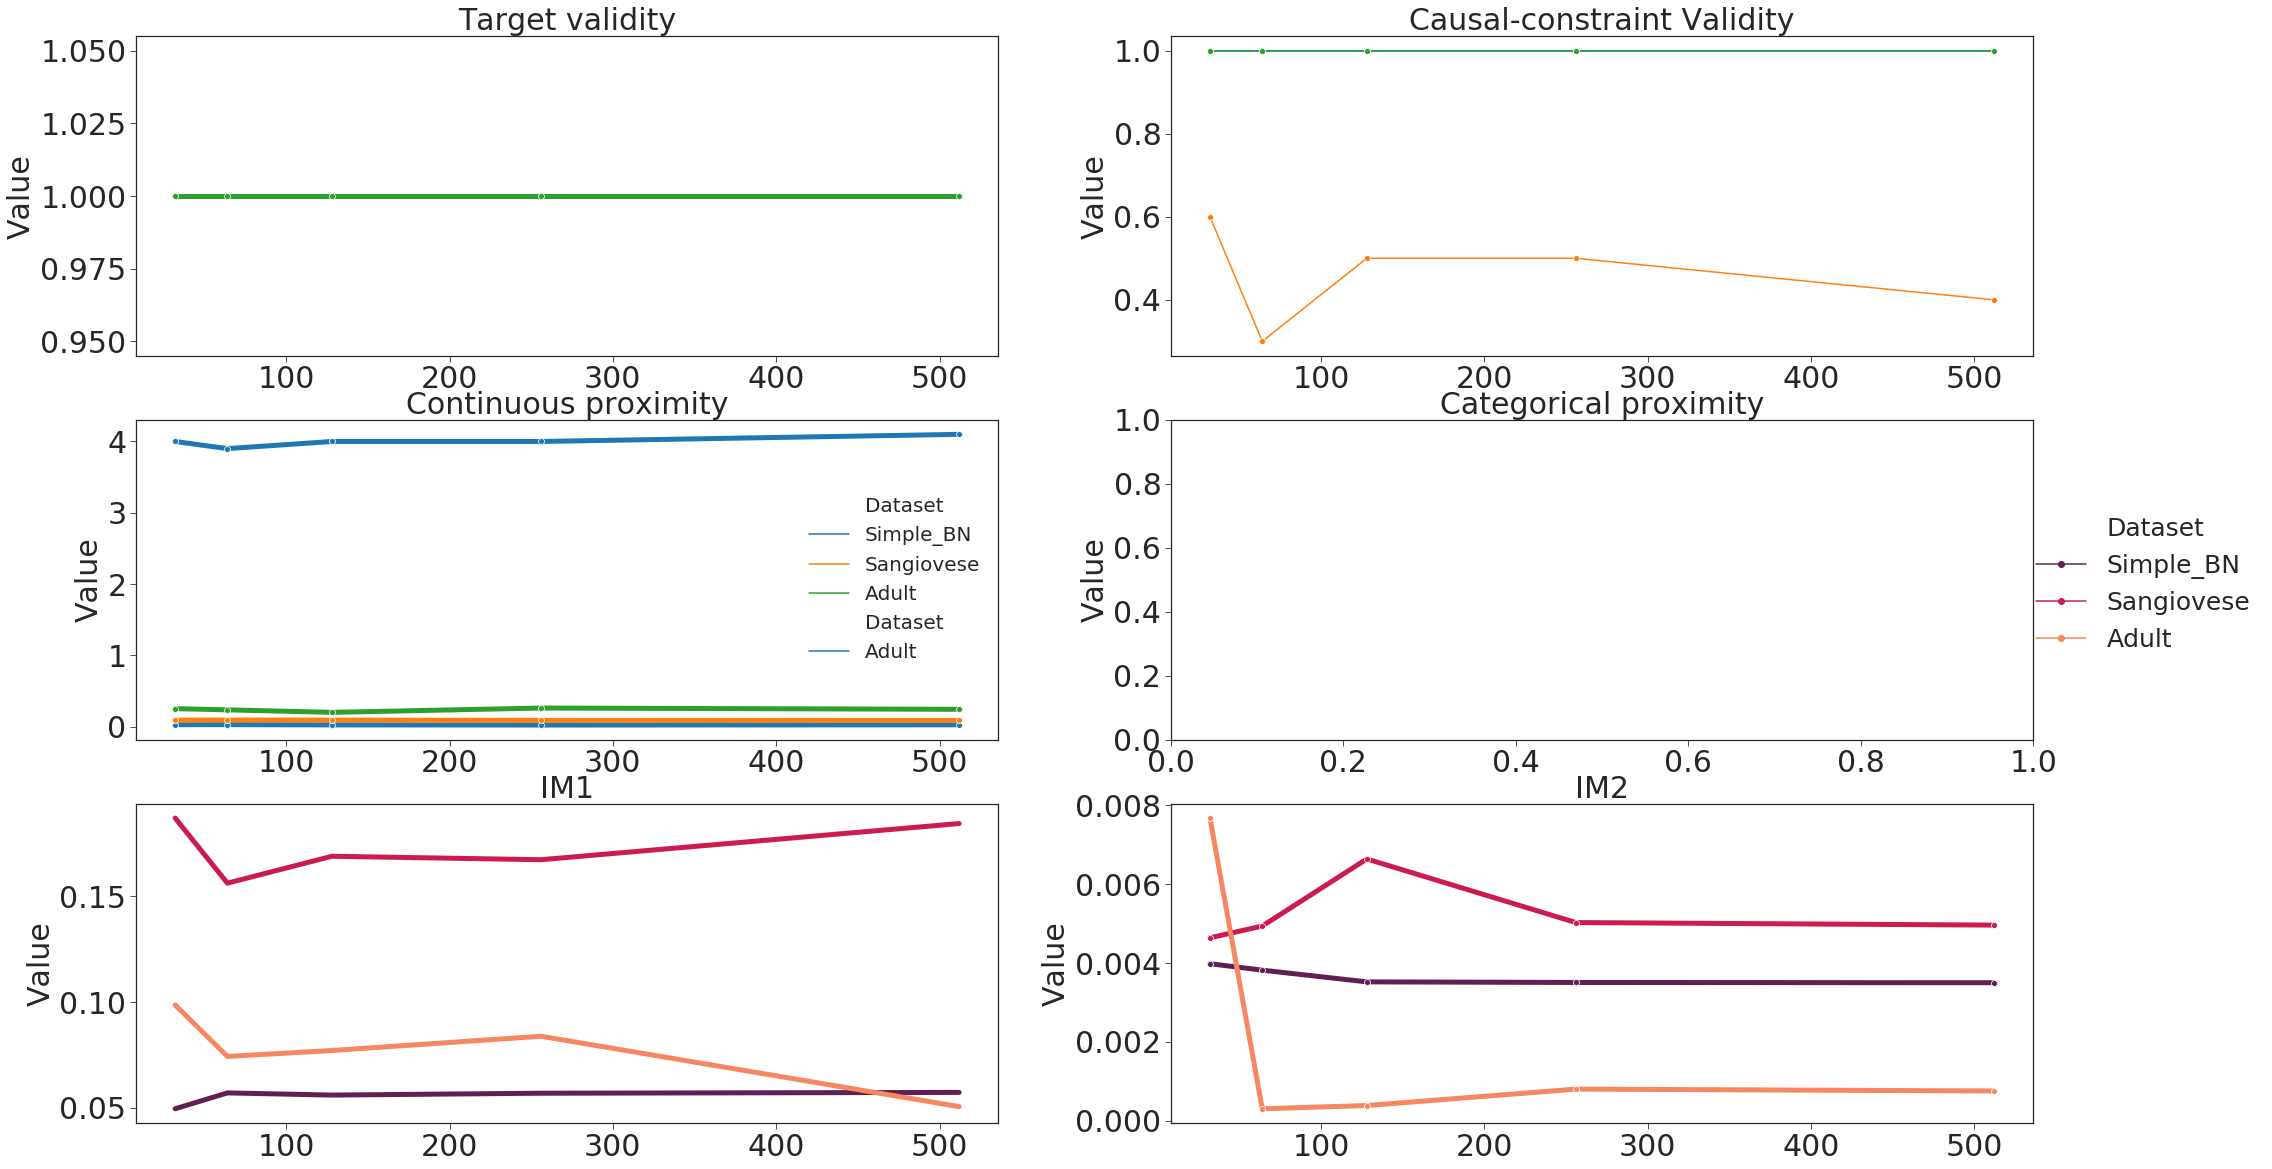

In [100]:
"""Visualize validity score"""
linewidth = 5
font_z = 38
handles = []
labels = []
with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(34, 20))

    x_value = 'emb_size'
    y_value = 'Value'
    hue_value = 'Dataset'

    name = 'Target validity'
    sns.set_context("notebook", rc=rc)

    ax_plt =  sns.lineplot(x="emb_size", y="Value", hue="Dataset",
                           data=valid_cf, marker="o", linewidth = linewidth, ax=axes[0,0])
    

    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.get_legend().remove()

    #ax_plt.set_xticks(range(len(valid_cf))) # <--- set the ticks first
    #ax_plt.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
 

    """Causal-constraint validity"""
    name = 'Causal-constraint Validity'

    ax_plt = sns.lineplot(x="emb_size", y="Value", hue="Dataset", data=causal_valid, marker="o", ax=axes[0,1])

    

    axes[0,1].set_title(name,fontsize= font_z) # title of plot
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)

    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt =  sns.lineplot(x="emb_size", y="Value", hue="Dataset", 
                           data=con_proximity, marker="o", linewidth = linewidth, ax=axes[1,0])
    
    
    axes[1,0].set_title(name,fontsize= font_z)
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)
    ax_plt.get_legend().remove()

 

    name = 'Categorical proximity'

    ax_plt =  sns.lineplot(x="emb_size", y="Value", hue="Dataset", 
                           data=cat_proximity, marker="o", linewidth = linewidth, ax=axes[1,0]
                           , color=axes[1,0].get_lines()[-1].get_c())
    

    axes[1,1].set_title(name,fontsize= font_z) # title of plot
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,1].set_ylabel("Value",fontsize= font_z) 
#     axes[1,1].set_ylim([0, 8])
    
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)
    
    name = 'IM1'

    ax_plt = sns.lineplot(data=IM1, x="emb_size", y="Value", palette="rocket",
                          hue="Dataset", 
                          ax=axes[2,0], linewidth = linewidth)

    axes[2,0].set_title(name,fontsize= font_z)
    axes[2,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,0].set_ylabel("Value",fontsize= font_z) 
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)

    ax_plt.get_legend().remove()

 

    name = 'IM2'

    ax_plt = sns.lineplot(data=IM2, x="emb_size", y="Value", palette="rocket",
                          hue="Dataset", markers=["o", "o","o"], dashes=False, style="Dataset",
                          ax=axes[2,1], linewidth = linewidth)

    axes[2,1].set_title(name,fontsize= font_z) # title of plot
    axes[2,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,1].set_ylabel("Value",fontsize= font_z) 

    ax_plt.get_legend().remove()
    ax_plt.set(xlabel=None)
    ax_plt.set(ylabel=None)
    
       
    h, l = axes[2,1].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
    
    fig.legend(handles, labels, loc='center right', fontsize= font_z)
    
    
fig.savefig(cf.FIGURE_PATH.format('different_size.png'), bbox_inches = 'tight')




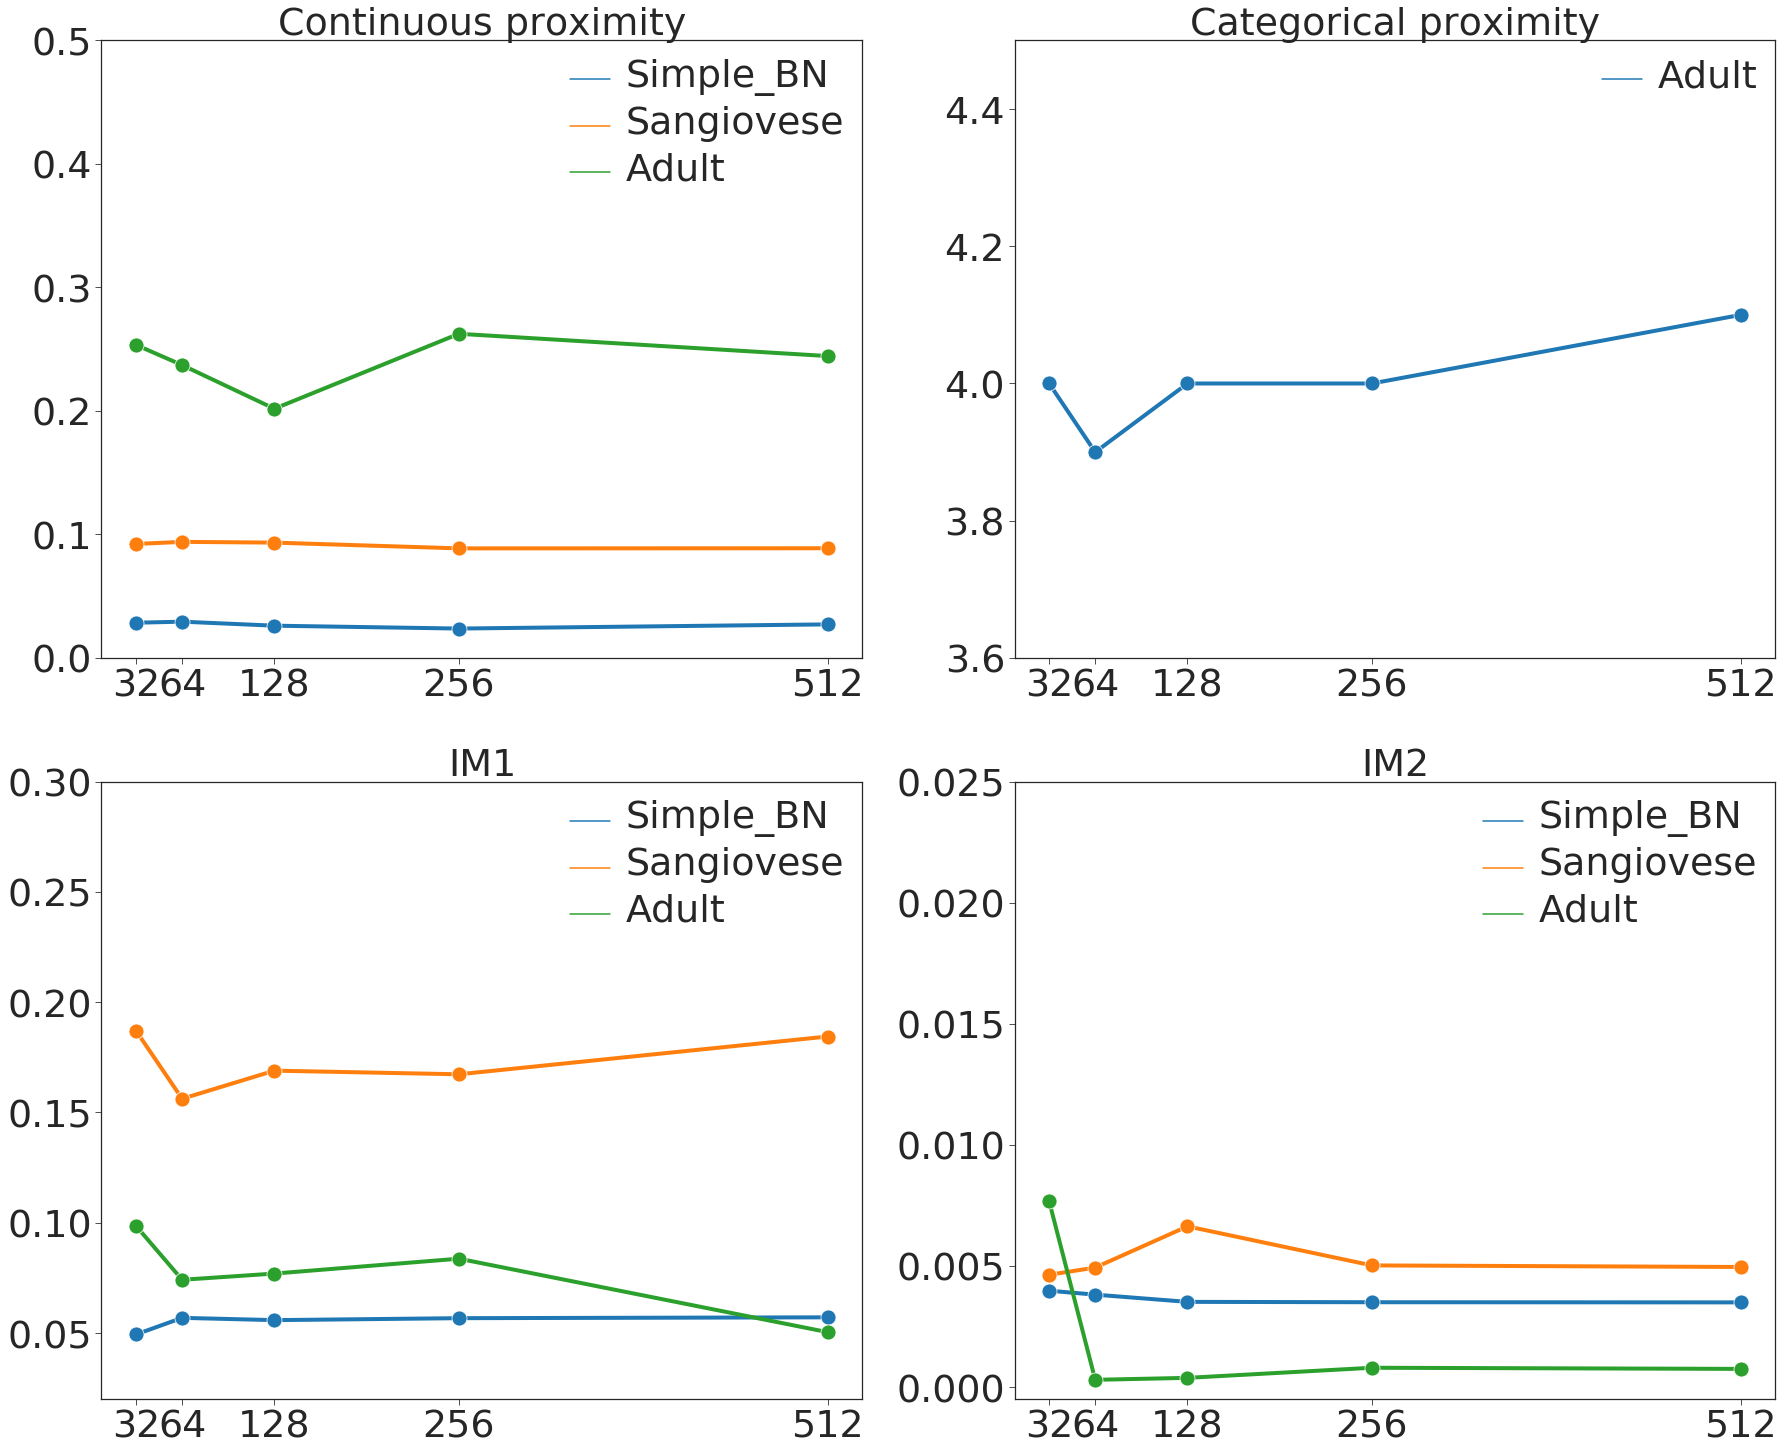

In [23]:
"""Visualize validity score"""
linewidth = 5
font_z = 38
handles = []
labels = []
list_ = mul_sample.emb_size.unique()

with plt.style.context('seaborn-ticks'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 25))
    sns.set_context("notebook", rc=rc)

    x_value = 'emb_size'
    y_value = 'Value'
    hue_value = 'Dataset'
    """
    name = 'Target validity'

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=valid_cf, marker="o", ax = axes[0,0])
    
    axes[0,0].set_xticks(list_, minor=False)
    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    axes[0,0].set_xlabel(None) 
    
    name = 'Causal-constraint Validity'
    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=causal_valid, marker="o", ax = axes[0,1])
    
    axes[0,1].set_xticks(list_, minor=False)
    axes[0,1].set_title(name,fontsize= font_z)
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    axes[0,1].set_xlabel(None) 
    
    """
    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=con_proximity, marker="o", 
                          linewidth = 4.0,
                          ax = axes[0,0],markersize=15)
    
    axes[0,0].set_xticks(list_, minor=False)
    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    #axes[0,0].set_ylabel("Value",fontsize= font_z) 
    axes[0,0].set_xlabel(None) 
    axes[0,0].set_ylabel(None) 

    axes[0,0].set_ylim([0, 0.5])



    name = 'Categorical proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=cat_proximity, marker="o", ax = axes[0,1],markersize=15)
    
    axes[0,1].set_xticks(list_, minor=False)
    axes[0,1].set_title(name,fontsize= font_z)
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    #axes[0,1].set_ylabel("Value",fontsize= font_z) 
    axes[0,1].set_xlabel(None) 
    axes[0,1].set_ylabel(None) 

    axes[0,1].set_ylim([3.6, 4.5])
    
    name = 'IM1'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=IM1, marker="o", ax = axes[1,0],markersize=15)
    
    axes[1,0].set_xticks(list_, minor=False)
    axes[1,0].set_title(name,fontsize= font_z)
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    #axes[1,0].set_ylabel("Value",fontsize= font_z) 
    axes[1,0].set_xlabel(None) 
    axes[1,0].set_ylabel(None) 

    axes[1,0].set_ylim([0.02, 0.3])
    
    name = 'IM2'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, linewidth = 4.0,
                          data=IM2, marker="o", ax = axes[1,1],markersize=15)
    
    axes[1,1].set_xticks(list_, minor=False)
    axes[1,1].set_title(name,fontsize= font_z)
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    #axes[1,1].set_ylabel("Value",fontsize= font_z) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylabel(None) 

    axes[1,1].set_ylim([-0.0005, 0.025])

    handles, labels = axes[0,0].get_legend_handles_labels()
    axes[0,0].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[0,1].get_legend_handles_labels()
    axes[0,1].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[1,0].get_legend_handles_labels()
    axes[1,0].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axes[1,1].get_legend_handles_labels()
    axes[1,1].legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(axes[0,0].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[0,1].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[1,0].get_legend().get_texts(), fontsize=font_z) # for legend text
    plt.setp(axes[1,1].get_legend().get_texts(), fontsize=font_z) # for legend text

    
fig.savefig(cf.FIGURE_PATH.format('different_size.png'), bbox_inches = 'tight')
  

## Visualize different sizes with confidence

In [ ]:
# nsample = 100
seeds = [1,2,3]
dataset_name = 'simple_bn'
frames = []

for s in seeds:
    PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-{}-seed-{}-.csv".format(dataset_name, s))
    df = pd.read_csv(PATH)
    frames.append(df)
df_simple_bn = pd.concat(frames)

dataset_name = 'siag'
for s in seeds:
    PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-{}-seed-{}-.csv".format(dataset_name, s))
    df = pd.read_csv(PATH)
    frames.append(df)
df_siag = pd.concat(frames)


dataset_name = 'adult'
for s in seeds:
    PATH = cf.FINAL_RESULT_PATH.format("evaluation/different_size-{}-seed-{}-.csv".format(dataset_name, s))
    df = pd.read_csv(PATH)
    frames.append(df)
df_adult = pd.concat(frames)



In [ ]:
df_simple_bn = df_simple_bn.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_simple_bn['Dataset'] = 'Simple_BN'

df_siag = df_siag.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})[:500]
df_siag['Dataset'] = 'Sangiovese'

df_adult = df_adult.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})
df_adult['Dataset'] = 'Adult'


In [ ]:
frames = [df_simple_bn, df_siag, df_adult]
mul_sample = pd.concat(frames)  
mul_sample =  mul_sample.reset_index(drop = True)
mul_sample = mul_sample.rename(columns={"metric": "Metric", "method": "Method", "value" : "Value"})

valid_cf = mul_sample[mul_sample['Metric'] == 'target valid']
causal_valid = mul_sample[mul_sample['Metric'] == 'causal validity']
con_proximity = mul_sample[mul_sample['Metric'] == 'continuous proximity']
cat_proximity = mul_sample[mul_sample['Metric'] == 'categorical proximity']
IM1 = mul_sample[mul_sample['Metric'] == 'IM1']
IM2 = mul_sample[mul_sample['Metric'] == 'IM2']


In [ ]:
cat_proximity

In [ ]:
"""Visualize validity score"""
linewidth = 5
font_z = 30
handles = []
labels = []
list_ = causal_valid.emb_size.unique()

with plt.style.context('seaborn-darkgrid'):
    """Get the subplot"""
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 34))
    sns.set_context("notebook", rc=rc)

    x_value = 'emb_size'
    y_value = 'Value'
    hue_value = 'Dataset'

    name = 'Target validity'

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=valid_cf, marker="o", ax = axes[0,0])
    
    axes[0,0].set_xticks(list_, minor=False)
    axes[0,0].set_title(name,fontsize= font_z)
    axes[0,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,0].set_ylabel("Value",fontsize= font_z) 
    axes[0,0].set_xlabel(None) 
    
    name = 'Causal-constraint Validity'
    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=causal_valid, marker="o", ax = axes[0,1])
    
    axes[0,1].set_xticks(list_, minor=False)
    axes[0,1].set_title(name,fontsize= font_z)
    axes[0,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[0,1].set_ylabel("Value",fontsize= font_z) 
    axes[0,1].set_xlabel(None) 
    axes[0,1].set_ylim([0, 2])
    
    name = 'Continuous proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=con_proximity, marker="o", ax = axes[1,0])
    
    axes[1,0].set_xticks(list_, minor=False)
    axes[1,0].set_title(name,fontsize= font_z)
    axes[1,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,0].set_ylabel("Value",fontsize= font_z) 
    axes[1,0].set_xlabel(None) 
    axes[1,0].set_ylim([0, 0.5])
    
    name = 'Categorical proximity'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=cat_proximity, marker="o", ax = axes[1,1])
    
    axes[1,1].set_xticks(list_, minor=False)
    axes[1,1].set_title(name,fontsize= font_z)
    axes[1,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[1,1].set_ylabel("Value",fontsize= font_z) 
    axes[1,1].set_xlabel(None) 
    axes[1,1].set_ylim([3.5, 4.25])

    name = 'IM1'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=IM1, marker="o", ax = axes[2,0])
    
    axes[2,0].set_xticks(list_, minor=False)
    axes[2,0].set_title(name,fontsize= font_z)
    axes[2,0].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,0].set_ylabel("Value",fontsize= font_z) 
    axes[2,0].set_xlabel(None) 
    axes[2,0].set_ylim([0.01, 0.7])
 
    name = 'IM2'
    sns.set_context("notebook", rc=rc)

    ax_plt = sns.lineplot(x=x_value, y=y_value, hue=hue_value, 
                          data=IM2, marker="o", ax = axes[2,1])
    
    axes[2,1].set_xticks(list_, minor=False)
    axes[2,1].set_title(name,fontsize= font_z)
    axes[2,1].tick_params(axis='both', which='major', labelsize=font_z)
    axes[2,1].set_ylabel("Value",fontsize= font_z) 
    axes[2,1].set_xlabel(None) 
    axes[2,1].set_ylim([-0.01, 0.03])
    
fig.savefig(cf.FIGURE_PATH.format('different_size.png'), bbox_inches = 'tight')
  